## Problem Statement

#### Decreasing the Customer Churn is a key goal for any business. Predicting Customer Churn (also known as Customer Attrition) represents an additional potential revenue source for any business. Customer Churn impacts the cost to the business. Higher Customer Churn leads to loss in revenue and the additional marketing costs involved with replacing those customers with new ones. 

#### In this challenge, as a data scientist of a bank, you are asked to analyze the past data and predict whether the customer will churn or not in the next 6 months. This would help the bank to have the right engagement with customers at the right time.

## Objective

#### Our objective is to build a machine learning model to predict whether the customer will churn or not in the next six months.



### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

import warnings 
warnings.filterwarnings('ignore')

In [2]:
trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')

In [3]:
trainData.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [4]:
trainData.describe(include = 'all')

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
count,6650,6650.000000,6650,6650,6.650000e+03,6650.000000,6650.000000,6650,6650.000000,6650,6650.000000
unique,6650,NaN,2,4,NaN,NaN,NaN,3,NaN,3,NaN
top,84e2fcc9,NaN,Male,10L - 15L,NaN,NaN,NaN,1,NaN,Poor,NaN
freq,1,NaN,3612,1885,NaN,NaN,NaN,3200,NaN,3076,NaN
mean,NaN,41.130226,NaN,NaN,8.045954e+05,2.250226,0.515789,NaN,0.664361,NaN,0.231128
std,NaN,9.685747,NaN,NaN,5.157549e+05,1.458795,0.499788,NaN,0.472249,NaN,0.421586
min,NaN,21.000000,NaN,NaN,6.300000e+01,0.000000,0.000000,NaN,0.000000,NaN,0.000000
25%,NaN,34.000000,NaN,NaN,3.922642e+05,1.000000,0.000000,NaN,0.000000,NaN,0.000000
50%,NaN,40.000000,NaN,NaN,7.649386e+05,2.000000,1.000000,NaN,1.000000,NaN,0.000000
75%,NaN,47.000000,NaN,NaN,1.147124e+06,3.000000,1.000000,NaN,1.000000,NaN,0.000000


In [5]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


In [6]:
xx = trainData['Is_Churn'].value_counts().reset_index()

<AxesSubplot:xlabel='index', ylabel='Is_Churn'>

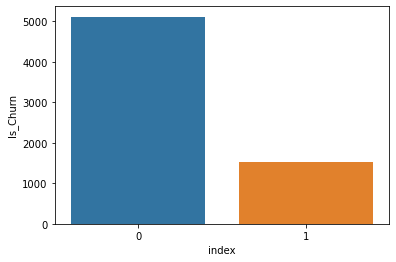

In [7]:
sns.barplot(x="index", y="Is_Churn", data=xx)

#### There is an imbalance in the dataset

In [8]:
class_count_0, class_count_1 = trainData['Is_Churn'].value_counts()

class_0 = trainData[trainData['Is_Churn'] == 0]
class_1 = trainData[trainData['Is_Churn'] == 1]

In [9]:
class_0_under = class_0.sample(class_count_1)

total class of 1 and 0: 0    1537
1    1537
Name: Is_Churn, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

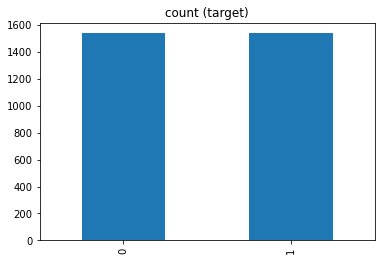

In [10]:
trainData = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:",trainData['Is_Churn'].value_counts())# plot the count after under-sampeling
trainData['Is_Churn'].value_counts().plot(kind='bar', title='count (target)')

#### There is no missing values in the dataset.
#### Now we should convert the categorical features into numerical one.

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [12]:
trainData['Gender'] = le.fit_transform(trainData['Gender'])
testData['Gender'] = le.fit_transform(testData['Gender'])

In [13]:
trainData['Credit_Category'] = le.fit_transform(trainData['Credit_Category'])
testData['Credit_Category'] = le.fit_transform(testData['Credit_Category'])

In [14]:
trainData['Income'] = le.fit_transform(trainData['Income'])
testData['Income'] = le.fit_transform(testData['Income'])

In [15]:
trainData['Product_Holdings'] = le.fit_transform(trainData['Product_Holdings'])
testData['Product_Holdings'] = le.fit_transform(testData['Product_Holdings'])

In [16]:
trainData.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
2017,dabc3052,55,0,3,490490.10,0,1,1,1,2,0
6274,95a88740,42,0,1,529171.02,1,0,1,1,2,0
148,c6d616ed,29,0,2,1223332.20,2,1,0,0,1,0
2201,d07c509c,43,0,2,138942.00,3,0,1,1,2,0
2928,8bc3eec9,54,0,3,829398.51,1,0,1,1,1,0


In [17]:
train_features = trainData.drop(['ID', 'Is_Churn'], axis=1)
train_target = trainData['Is_Churn']

In [18]:
test_features = testData.drop(['ID'], axis=1)

### Scaling the Data

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(train_features)
features_scaled = pd.DataFrame(x_scaled, columns=train_features.columns)

scaler = MinMaxScaler()
x_test_scaled = scaler.fit_transform(test_features)
test_features_scaled = pd.DataFrame(x_test_scaled, columns=test_features.columns)

### Spliting the data

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_scaled, train_target, test_size = 0.3, random_state = 5)

### Model Training

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

results = {} #dictionary to store accuracy and f1-score of models

#### Logistic Regression


In [22]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)

f1_lr = f1_score(y_test, pred_lr, average='macro')
results['Logistic Regression'] = [f1_lr]

print('f1_score : ', f1_lr)

f1_score :  0.581196279787094


#### K Nearest Neighbour

In [23]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

f1_knn = f1_score(y_test, pred_knn, average='macro')
results['K-Nearest Neighbors'] = [f1_knn]

print('f1_score: ', f1_knn)

f1_score:  0.525415332312807


#### Decision Tree

In [24]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
pred_tree = tree.predict(x_test)

f1_tree = f1_score(y_test, pred_tree, average='macro')
results['Decision Tree'] = [f1_tree]

print('f1_score:  ', f1_tree)

f1_score:   0.5351326919351715


#### Random Forest

In [25]:
rf = RandomForestClassifier(n_estimators=1000,max_depth=8,random_state=33)
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)

f1_rf = f1_score(y_test, pred_rf, average='macro')
results['Random Forest'] = [f1_rf]

print('f1_score:  ', f1_rf)

f1_score:   0.5915013459274103


#### Ada Boost

In [26]:
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)
pred_abc = abc.predict(x_test)

f1_abc = f1_score(y_test, pred_abc, average='macro')
results['AdaBoost'] = [f1_abc]

print('f1_score :  ', f1_abc)

f1_score :   0.5741165365202474


### Hyperparameter Tuning and Fitting the model


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#### Logistic Regression

In [28]:
grid = [
    {
        'penalty':['l1', 'l2', 'elasticnet','none'],
        'C': np.logspace(-3,3,7),
        'solver':['lbfs', 'newton_cg', 'libilinear', 'sag', 'saga'],
        'max_iter':[100, 1000, 2500, 5000]
    }
]

lr1 = LogisticRegression()
clf = GridSearchCV(lr1, grid, cv=2, verbose=True, n_jobs=-1)
best_clf = clf.fit(x_train, y_train)
best_clf.best_estimator_

Fitting 2 folds for each of 560 candidates, totalling 1120 fits


LogisticRegression(max_iter=1000, penalty='l1', solver='saga')

In [57]:
lr = LogisticRegression(max_iter=1000, penalty='l1', solver='saga')
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)

f1_lr = f1_score(y_test, pred_lr, average='macro')

print('f1_score:  ', f1_lr)

f1_score:   0.5802104817811624


In [58]:
lr = LogisticRegression(max_iter=1000, penalty='l1', solver='saga')
lr.fit(x_train, y_train)

pred_lr = lr.predict(test_features_scaled)

In [59]:
df_lr = pd.DataFrame({'ID': testData['ID'],'Is_Churn': pred_lr})
df_lr.to_csv('LRClassify.csv', index=False)

#### K Nearest Neighbour

In [32]:
grid = [{"n_neighbors":np.arange(1,50)}]

clf_knn = GridSearchCV(KNeighborsClassifier(), param_grid=grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
best_clf_knn = clf_knn.fit(x_train, y_train)
best_clf_knn.best_estimator_

Fitting 10 folds for each of 49 candidates, totalling 490 fits


KNeighborsClassifier(n_neighbors=23)

In [60]:
knn = KNeighborsClassifier(n_neighbors = 23)
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

f1_knn = f1_score(y_test, pred_knn, average='macro')

print('f1_score :  ', f1_knn)

f1_score :   0.5579501915708812


In [61]:
knn = KNeighborsClassifier(n_neighbors = 23)
knn.fit(x_train,y_train)

pred_knn = knn.predict(test_features_scaled)

In [62]:
df_knn = pd.DataFrame({'ID': testData['ID'],'Is_Churn': pred_knn})
df_knn.to_csv('KNNClassify.csv', index=False)

#### Decision Tree

In [36]:
grid_params = [{
                   'criterion' : ["gini", "entropy"],
                    'splitter' : ["best", "random"],
                    'max_depth': np.arange(1, 10)
}]

datagrid_object = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid = grid_params, scoring = 'accuracy', cv = 3, n_jobs = -1)
datagrid_object.fit(x_train, y_train)
print(datagrid_object.best_score_)

0.612738261273826


In [37]:
print(datagrid_object.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random'}


In [63]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter= 'random')
tree.fit(x_train,y_train)
pred_tree = tree.predict(x_test)

f1_tree= f1_score(y_test, pred_tree, average='macro')

print('f1_score :  ', f1_tree)

f1_score :   0.5869809559043744


In [64]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter= 'random')
tree.fit(x_train,y_train)

pred_tree = tree.predict(test_features_scaled)

In [65]:
df_tree = pd.DataFrame({'ID': testData['ID'],'Is_Churn': pred_tree})
df_tree.to_csv('DTClassify.csv', index=False)

#### Random Forest

In [41]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [42]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)
print(rf_random.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
0.601115760111576


In [43]:
print(rf_random.best_params_)

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


In [48]:
rf = RandomForestClassifier(n_estimators= 200, min_samples_split=5, min_samples_leaf=4, max_features='auto', max_depth=10, bootstrap=True)
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)

f1_rf = f1_score(y_test, pred_rf, average='macro')

print('f1_score :  ', f1_rf)

f1_score :   0.5850468057634182


In [49]:
rf = RandomForestClassifier(n_estimators= 200, min_samples_split=5, min_samples_leaf=4, max_features='auto', max_depth=10, bootstrap=True)
rf.fit(x_train,y_train)

pred_rf = rf.predict(test_features_scaled)

In [50]:
df_rf = pd.DataFrame({'ID': testData['ID'],'Is_Churn': pred_rf})
df_rf.to_csv('RFClassify.csv', index=False)

#### Ada Boost

In [51]:
parameters = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']   
}

abc = AdaBoostClassifier()
clf = GridSearchCV(abc, parameters, cv=5, verbose=True, n_jobs=-1)
clf.fit(x_train, y_train)
print(clf.best_score_)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
0.6164690012410297


In [52]:
print(clf.best_params_)

{'algorithm': 'SAMME', 'learning_rate': 1.03, 'n_estimators': 10}


In [54]:
abc = AdaBoostClassifier(algorithm='SAMME', learning_rate=1.03, n_estimators=10)
abc.fit(x_train, y_train)
pred_abc = abc.predict(x_test)

f1_abc = f1_score(y_test, pred_abc, average='macro')

print('f1_score :  ', f1_abc)

f1_score :   0.5763734090218132


In [55]:
abc = AdaBoostClassifier(algorithm='SAMME', learning_rate=1.03, n_estimators=10)
abc.fit(x_train,y_train)

pred_abc = abc.predict(test_features_scaled)

In [56]:
df_abc = pd.DataFrame({'ID': testData['ID'],'Is_Churn': pred_abc})
df_abc.to_csv('ABClassify.csv', index=False)